### Tasca M5 T02
Descripció

Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

In [1]:
# Passes preliminars

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carreguem la base de dades
housing = pd.read_csv('housing data.csv', 
        names =('CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'))
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### - Exercici 1

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

In [3]:
# Fem la divisió entre el dos conjunts

from sklearn.model_selection import train_test_split

housing_train, housing_test = train_test_split(housing, test_size=0.2)

In [4]:
# Veiem el set Train

housing_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
28,0.77299,0.0,8.14,0,0.538,6.495,94.4,4.4547,4,307.0,21.0,387.94,12.80,18.4
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80,13.8
420,11.08740,0.0,18.10,0,0.718,6.411,100.0,1.8589,24,666.0,20.2,318.75,15.02,16.7
182,0.09103,0.0,2.46,0,0.488,7.155,92.2,2.7006,3,193.0,17.8,394.12,4.82,37.9
129,0.88125,0.0,21.89,0,0.624,5.637,94.7,1.9799,4,437.0,21.2,396.90,18.34,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.37578,0.0,10.59,1,0.489,5.404,88.6,3.6650,4,277.0,18.6,395.24,23.98,19.3
407,11.95110,0.0,18.10,0,0.659,5.608,100.0,1.2852,24,666.0,20.2,332.09,12.13,27.9
186,0.05602,0.0,2.46,0,0.488,7.831,53.6,3.1992,3,193.0,17.8,392.63,4.45,50.0
136,0.32264,0.0,21.89,0,0.624,5.942,93.5,1.9669,4,437.0,21.2,378.25,16.90,17.4


In [5]:
# I veiem una descripció estadística básica

print('housing_train')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
housing_train.describe()

housing_train


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,3.86,11.71,11.22,0.07,0.56,6.29,68.58,3.80,9.91,415.17,18.45,357.08,12.67,22.53
std,9.14,23.92,6.98,0.25,0.12,0.72,28.26,2.13,8.91,172.41,2.18,88.99,7.06,9.22
min,0.01,0.00,0.74,0.00,0.39,3.56,6.00,1.17,1.00,188.00,12.60,2.60,1.73,5.00
25%,0.08,0.00,5.08,0.00,0.45,5.88,43.20,2.08,4.00,279.75,17.40,374.24,6.92,16.95
50%,0.27,0.00,9.79,0.00,0.54,6.21,77.70,3.14,5.00,334.50,19.10,391.28,11.47,21.20
75%,3.90,13.75,18.10,0.00,0.64,6.62,94.10,5.23,24.00,666.00,20.20,395.75,17.13,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,10.71,24.00,711.00,22.00,396.90,36.98,50.00


In [6]:
# Veiem ara el set per Test

housing_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
240,0.11,30.00,4.93,0,0.43,6.90,54.30,6.34,6,300.00,16.60,391.25,11.38,22.00
62,0.11,25.00,5.13,0,0.45,6.46,67.80,7.23,8,284.00,19.70,396.90,6.73,22.20
99,0.07,0.00,2.89,0,0.45,7.42,62.50,3.50,2,276.00,18.00,396.90,6.19,33.20
90,0.05,0.00,3.41,0,0.49,6.42,66.10,3.09,2,270.00,17.80,392.18,8.81,22.60
179,0.06,0.00,2.46,0,0.49,6.98,58.40,2.83,3,193.00,17.80,396.90,5.04,37.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.07,0.00,4.05,0,0.51,6.86,74.40,2.92,5,296.00,16.60,391.27,6.92,29.90
473,4.65,0.00,18.10,0,0.61,6.98,67.60,2.53,24,666.00,20.20,374.68,11.66,29.80
311,0.79,0.00,9.90,0,0.54,6.12,52.80,2.64,4,304.00,18.40,396.90,5.98,22.10
104,0.14,0.00,8.56,0,0.52,6.17,90.00,2.42,5,384.00,20.90,392.69,12.33,20.10


In [7]:
# I el mateix pel Test, una descripció bàsica

print('housing_test')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
housing_test.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)

housing_test


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,2.64,9.99,10.79,0.08,0.55,6.27,68.55,3.77,8.11,380.76,18.49,355.06,12.59,22.55
std,5.97,20.85,6.37,0.27,0.11,0.65,27.83,2.03,7.75,149.89,2.10,100.36,7.49,9.15
min,0.01,0.00,0.46,0.00,0.39,4.14,2.90,1.13,1.00,187.00,13.00,0.32,1.92,5.00
25%,0.09,0.00,5.98,0.00,0.46,5.93,49.30,2.19,4.00,277.50,17.10,377.12,7.19,17.18
50%,0.22,0.00,8.56,0.00,0.54,6.20,77.10,3.40,5.00,307.00,18.80,392.61,11.04,21.40
75%,1.55,9.38,18.10,0.00,0.61,6.64,92.83,4.84,6.00,423.25,20.20,396.90,15.95,25.77
max,38.35,90.00,25.65,1.00,0.87,8.70,100.00,12.13,24.00,666.00,21.20,396.90,37.97,50.00


In [8]:
 # Aqui anem a compara els promitjos de les dues variables, i farem el ratio

housing_means = pd.DataFrame()

columns =['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

housing_test_mean = housing_test.mean()
housing_test_mean_np = housing_test_mean.to_numpy()
housing_train_mean = housing_train.mean()
housing_train_mean_np = housing_train_mean.to_numpy()

housing_means['Columnes'] = columns
housing_means['Test'] = housing_test_mean_np
housing_means['Train'] = housing_train_mean_np
housing_means['T/T ratio'] = housing_means['Test'] / housing_means['Train']
housing_means

,Columnes,Test,Train,T/T ratio
0,CRIM,2.64,3.86,0.68
1,ZN,9.99,11.71,0.85
2,INDUS,10.79,11.22,0.96
3,CHAS,0.08,0.07,1.17
4,NOX,0.55,0.56,0.98
5,RM,6.27,6.29,1.00
6,AGE,68.55,68.58,1.00
7,DIS,3.77,3.80,0.99
8,RAD,8.11,9.91,0.82
9,TAX,380.76,415.17,0.92


## - Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [9]:
# Estadarització de les dades: NOX i AGE 

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x = housing['NOX']
x = x.array.reshape(-1, 1)
scaled_NOX = scale.fit_transform(x)

x = housing['AGE']
x = x.array.reshape(-1, 1)
scaled_AGE = scale.fit_transform(x)

housing['scaled_NOX'] = scaled_NOX
housing['scaled_AGE'] = scaled_AGE

housing[['NOX','AGE','scaled_NOX','scaled_AGE']]

,NOX,AGE,scaled_NOX,scaled_AGE
0,0.54,65.20,-0.14,-0.12
1,0.47,78.90,-0.74,0.37
2,0.47,61.10,-0.74,-0.27
3,0.46,45.80,-0.84,-0.81
4,0.46,54.20,-0.84,-0.51
...,...,...,...,...
501,0.57,69.10,0.16,0.02
502,0.57,76.70,0.16,0.29
503,0.57,91.00,0.16,0.80
504,0.57,89.30,0.16,0.74


In [10]:

# Binaritzem una variable (AGE) en menys de 65 ó 65+ anys
from sklearn import preprocessing
from sklearn.preprocessing import Binarizer 
   
x = housing['AGE']
x = x.array.reshape(-1, 1)
binarizer_1 = Binarizer(65)
binary_AGE = binarizer_1.fit_transform(x)
housing['binary_AGE'] = binary_AGE
housing[['AGE','scaled_AGE','binary_AGE']]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=65 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


,AGE,scaled_AGE,binary_AGE
0,65.20,-0.12,1.00
1,78.90,0.37,1.00
2,61.10,-0.27,0.00
3,45.80,-0.81,0.00
4,54.20,-0.51,0.00
...,...,...,...
501,69.10,0.02,1.00
502,76.70,0.29,1.00
503,91.00,0.80,1.00
504,89.30,0.74,1.00


In [11]:
# Discretitzem una variable (MEDV) en 3 parts
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer 

x = housing['MEDV']
x = x.array.reshape(-1, 1)
est = preprocessing.KBinsDiscretizer(n_bins= 3).fit(x)
x = est.transform(x)
c = x.tocoo()                                                                                        

binned_MEDV = pd.DataFrame({'node1': c.row, 'node2': c.col, 'edge_weight': c.data})
housing['binned_MEDV'] = binned_MEDV['node2']
housing[['MEDV','binned_MEDV']]


,MEDV,binned_MEDV
0,24.00,2
1,21.60,1
2,34.70,2
3,33.40,2
4,36.20,2
...,...,...
501,22.40,1
502,20.60,1
503,23.90,2
504,22.00,1


In [12]:
# Farem una variable Dummy de binned_MEDV

valor_binned_MEDV = {0:'Barat', 1:'Mitja', 2:'Car'}
housing['binned_MEDV'] = housing['binned_MEDV'].map(valor_binned_MEDV)
housing_dummy = pd.get_dummies(housing['binned_MEDV'], prefix="Preu")
housing_dummy

,Preu_Barat,Preu_Car,Preu_Mitja
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
501,0,0,1
502,0,0,1
503,0,1,0
504,0,0,1


In [13]:
# I ho juntem tot al mateix dataframe: housing

# Primer obtinc en nom de totes les columnes de housing
nom_columnes = housing.columns.values.tolist()

# Ho juntem tot, fent servir el llistat de totes les columnes
housing = housing[nom_columnes].join(housing_dummy)
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B,LSTAT,MEDV,scaled_NOX,scaled_AGE,binary_AGE,binned_MEDV,Preu_Barat,Preu_Car,Preu_Mitja
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,...,396.90,4.98,24.00,-0.14,-0.12,1.00,Car,0,1,0
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,...,396.90,9.14,21.60,-0.74,0.37,1.00,Mitja,0,0,1
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,...,392.83,4.03,34.70,-0.74,-0.27,0.00,Car,0,1,0
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,...,394.63,2.94,33.40,-0.84,-0.81,0.00,Car,0,1,0
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,...,396.90,5.33,36.20,-0.84,-0.51,0.00,Car,0,1,0


In [14]:
# Generem un polinomi

from sklearn.preprocessing import PolynomialFeatures

names =['1','RM','TAX','LSTAT','RM^2','RM*TAX','RM*LSTAT','TAX^2','TAX*LSTAT','LSTAT^2']

housing_poly = housing[['RM','TAX','LSTAT']].copy()
poly = PolynomialFeatures(degree = 2, interaction_only = False)
poly.fit(housing_poly)
housing_poly2 = poly.transform(housing_poly)

housing_poly3 = pd.DataFrame(housing_poly2, columns=names)
housing_poly3


,1,RM,TAX,LSTAT,RM^2,RM*TAX,RM*LSTAT,TAX^2,TAX*LSTAT,LSTAT^2
0,1.00,6.58,296.00,4.98,43.23,1946.20,32.74,87616.00,1474.08,24.80
1,1.00,6.42,242.00,9.14,41.23,1553.88,58.69,58564.00,2211.88,83.54
2,1.00,7.18,242.00,4.03,51.62,1738.77,28.96,58564.00,975.26,16.24
3,1.00,7.00,222.00,2.94,48.97,1553.56,20.57,49284.00,652.68,8.64
4,1.00,7.15,222.00,5.33,51.08,1586.63,38.09,49284.00,1183.26,28.41
...,...,...,...,...,...,...,...,...,...,...
501,1.00,6.59,273.00,9.67,43.47,1799.89,63.75,74529.00,2639.91,93.51
502,1.00,6.12,273.00,9.08,37.45,1670.76,55.57,74529.00,2478.84,82.45
503,1.00,6.98,273.00,5.64,48.66,1904.45,39.34,74529.00,1539.72,31.81
504,1.00,6.79,273.00,6.48,46.16,1854.76,44.03,74529.00,1769.04,41.99


### - Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

#### Columnes estandaritzades (AGE i NOX)
Fem una descripció estadística i uns histogrames per demostrar que la distribució de les columnes no ha canviat

In [15]:
# Fem una descripció estadística només de les columnes estandaritzades i els seus originals

housing_estandard = housing[['AGE','scaled_AGE','NOX','scaled_NOX']].copy()

housing_estandard.describe()

,AGE,scaled_AGE,NOX,scaled_NOX
count,506.00,506.00,506.00,506.00
mean,68.57,-0.00,0.55,-0.00
std,28.15,1.00,0.12,1.00
min,2.90,-2.34,0.39,-1.47
25%,45.02,-0.84,0.45,-0.91
50%,77.50,0.32,0.54,-0.14
75%,94.07,0.91,0.62,0.60
max,100.00,1.12,0.87,2.73


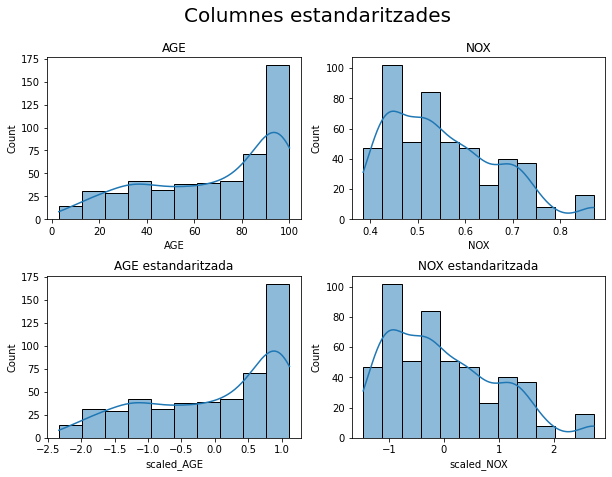

In [16]:
# Columnes estandaritzades: 'NOX','AGE','scaled_NOX','scaled_AGE'

import seaborn as sns

plt.figure(figsize=(10,7))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.35)
plt.suptitle("Columnes estandaritzades", size = 20)

plt.subplot(2,2,1)
sns.histplot(data = housing['AGE'], kde = True)
plt.title('AGE')

plt.subplot(2,2,2)
sns.histplot(data = housing['NOX'], kde = True)
plt.title('NOX')

plt.subplot(2,2,3)
sns.histplot(data = housing['scaled_AGE'], kde = True)
plt.title('AGE estandaritzada')

plt.subplot(2,2,4)
sns.histplot(data = housing['scaled_NOX'], kde = True)
plt.title('NOX estandaritzada');


#### Columna binaritzada (AGE)
Fem una descripció estadística i uns histogrames per demostrar que la distribució de les columnes no ha canviat

In [17]:
# Fem una descripció estadística només de la columna binaritzada i el seu original

import seaborn as sns

housing_binary = housing[['AGE','binary_AGE']].copy()

housing_binary.describe()

,AGE,binary_AGE
count,506.00,506.00
mean,68.57,0.61
std,28.15,0.49
min,2.90,0.00
25%,45.02,0.00
50%,77.50,1.00
75%,94.07,1.00
max,100.00,1.00


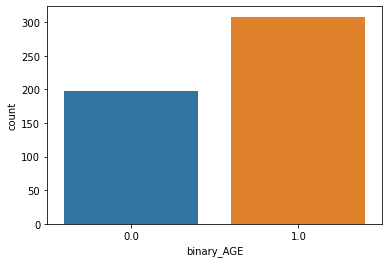

In [18]:
# Fem un gràfic que ens mostri el numero d'entrades que hi ha per cada categoria

import seaborn as sns

sns.countplot(x = 'binary_AGE', data = housing);

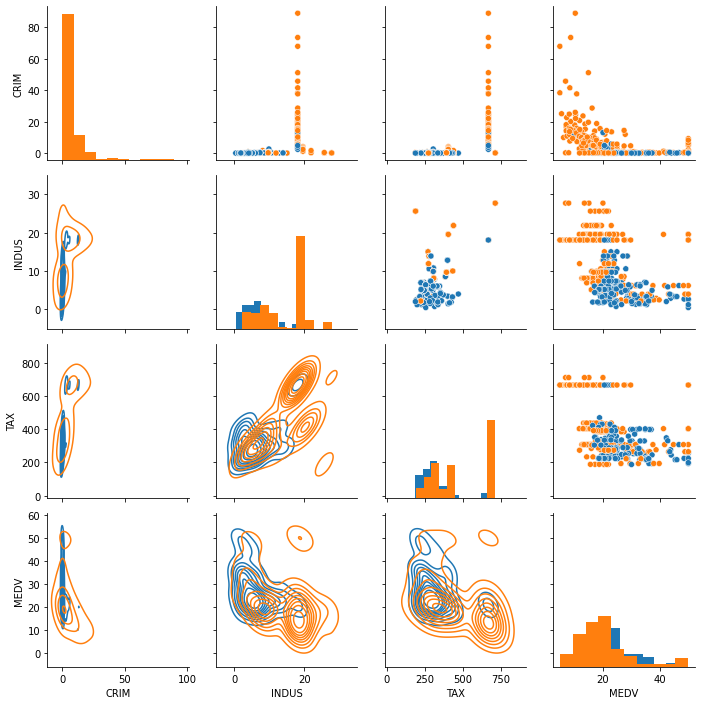

In [19]:
# La variable binary_AGE ens pot ser molt útil per distingir diferentes relacion segons el rang d'edat

import seaborn as sns

# Fem un DataFrame reduit amb 4 variables que volem estudiar
housing_reduced = housing[['CRIM','INDUS','TAX','MEDV','binary_AGE']].copy()

graph = sns.PairGrid(housing_reduced, hue= 'binary_AGE')
graph = graph.map_diag(plt.hist)
graph = graph.map_upper(sns.scatterplot)
graph = graph.map_lower(sns.kdeplot)
plt.show()



#### Columna convertida en valors discrets (binned_MEDV)

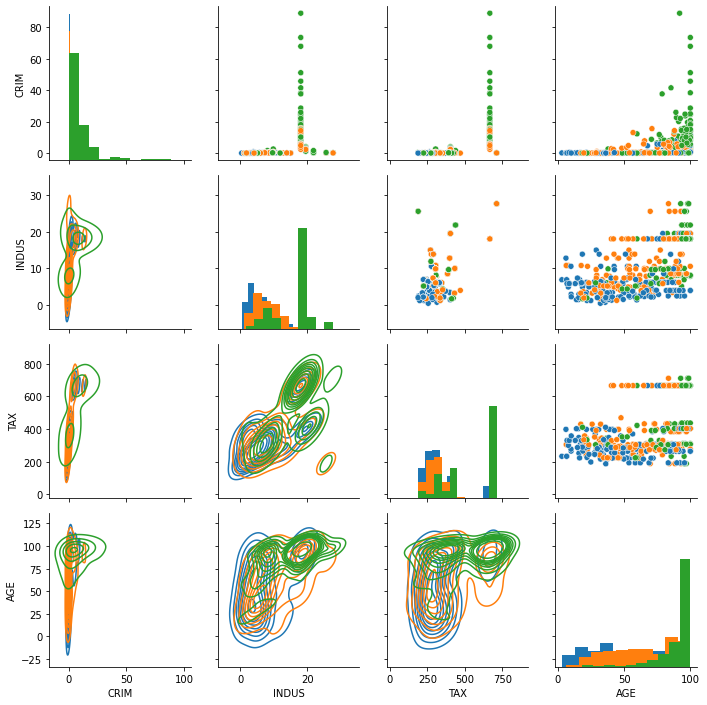

In [20]:
# La variable binned_MEDV també ens podria ser molt útil per distingir diferentes relacions segons el valor

import seaborn as sns

# Fem un DataFrame reduit amb 4 variables que volem estudiar
housing_discreta = housing[['CRIM','INDUS','TAX','AGE','binned_MEDV']].copy()

graph = sns.PairGrid(housing_discreta, hue= 'binned_MEDV')
graph = graph.map_diag(plt.hist)
graph = graph.map_upper(sns.scatterplot)
graph = graph.map_lower(sns.kdeplot)
plt.show()
